
# Tarea N°02
## Instrucciones
1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.

**Nombre**: Javier Alonso Valladares Cortes

**Rol**: 201710508-9

2.- Debes pushear este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:

- Soluciones
- Código
- Que Binder esté bien configurado.
- Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [6]:
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


* ¿Cómo se distribuyen los datos?

In [7]:
digits.describe().loc['mean'].mean() #Calculamos el promedio

4.8781130944736955

In [8]:
digits.describe().loc['std'].mean() #Calculamos el promedio de la desviación estandar

3.6714358224863632

Podemos ver que los datos se distribuyen con un promedio aproximado de 4.878 y una desviación estandar 3.671

* ¿Cuánta memoria estoy utilizando?

In [9]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int32
 1   c01     1797 non-null   int32
 2   c02     1797 non-null   int32
 3   c03     1797 non-null   int32
 4   c04     1797 non-null   int32
 5   c05     1797 non-null   int32
 6   c06     1797 non-null   int32
 7   c07     1797 non-null   int32
 8   c08     1797 non-null   int32
 9   c09     1797 non-null   int32
 10  c10     1797 non-null   int32
 11  c11     1797 non-null   int32
 12  c12     1797 non-null   int32
 13  c13     1797 non-null   int32
 14  c14     1797 non-null   int32
 15  c15     1797 non-null   int32
 16  c16     1797 non-null   int32
 17  c17     1797 non-null   int32
 18  c18     1797 non-null   int32
 19  c19     1797 non-null   int32
 20  c20     1797 non-null   int32
 21  c21     1797 non-null   int32
 22  c22     1797 non-null   int32
 23  c23     1797 

Podemos ver que la memoria usada por digits es de 456.4 KB.

* ¿Qué tipo de datos son?

También podemos ver que el tipo de datos que estamos trabajando son int32, es decir variables númericas.

* ¿Cuántos registros por clase hay?

Existen 1797 registros por cada clase.

* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

La clase c00 puede ser una clase que corresponda segun lo que se sabe, debido a que es una clase llena de ceros, los cuales no tienen ninguna información que aportar al desarrollo de la tarea.

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [10]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

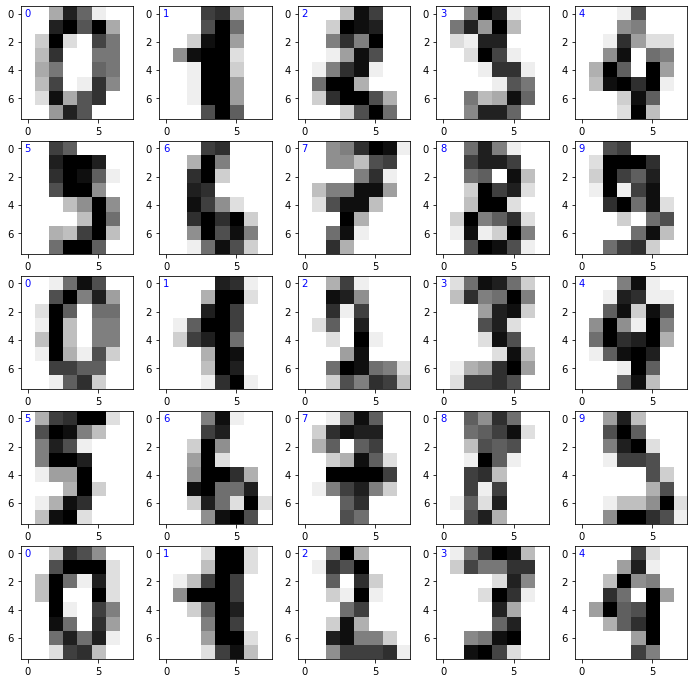

In [11]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(digits_dict["images"][i*5 +j],cmap='gray_r') #Graficamos todas las imagenes
        axs[i,j].text(0, 0, digits_dict['target'][i*5 +j], horizontalalignment='center',
                      verticalalignment='center', fontsize=10, color='blue') #Agregamos el label de la imagen

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [12]:
X = digits.drop(columns="target").values
y = digits["target"].values

In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Dividimos los datos

#Como tenemos una cantidad de valores entre 1000-100000, es adecuado tener una relacion 80-20  

# Impresion del largo de las filas
print('Veamos el largo de los conjuntos:\n')
print('Cantidad inicial de datos : ',len(X))
print('Largo del conjunto de entrenamiento  : ',len(X_train))
print('Largo del conjunto de testeo : ',len(X_test))

Veamos el largo de los conjuntos:

Cantidad inicial de datos :  1797
Largo del conjunto de entrenamiento  :  1437
Largo del conjunto de testeo :  360


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm

#para cada uno crear un conjunto de hiperparametros

parametros_lr = {'penalty': ['l1','l2','elasticnet','none'],'tol':[0.1,0.2,0.3]}

clf_lr = GridSearchCV(LogisticRegression(),parametros_lr,cv = 5, return_train_score =False) #Aplicamos GridSearchCV

clf_lr.fit(X_train,y_train)

parametros_kn = {'algorithm':['brute','kd_tree','ball_tree','auto'],'leaf_size':[1,10,20],'n_neighbors':[1,2,3,4,10,20]}

clf_kn = GridSearchCV(KNeighborsRegressor(),parametros_kn,cv = 5, return_train_score =False)#Aplicamos GridSearchCV

clf_kn.fit(X_train,y_train)

parametros_sv = {'kernel':['rbf','linear'],'C':[1,10,20,30]}

clf_sv = GridSearchCV(svm.SVC(),parametros_sv,cv = 5, return_train_score =False)#Aplicamos GridSearchCV

clf_sv.fit(X_train,y_train)

C:\Users\jvall\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jvall\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jvall\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jvall\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\jvall\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: Co

C:\Users\jvall\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jvall\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jvall\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30], 'kernel': ['rbf', 'linear']})

In [15]:
#Imprimimos la mejor combinación de parámetros para este modelo y el tiempo maximo que se demorá en ajustar
print(clf_lr.best_score_)
print(clf_lr.best_params_)
print('tiempo de entrenamiento = '+str(pd.DataFrame(clf_lr.cv_results_)['std_fit_time'].max())) 

0.9540626209833526
{'penalty': 'l2', 'tol': 0.1}
tiempo de entrenamiento = 0.018198097369197083


In [16]:
#Imprimimos la mejor combinación de parámetros para este modelo y el tiempo maximo que se demorá en ajustar
print(clf_kn.best_score_)
print(clf_kn.best_params_)
print('tiempo de entrenamiento = '+str(pd.DataFrame(clf_kn.cv_results_)['std_fit_time'].max()))

0.9606216420295706
{'algorithm': 'brute', 'leaf_size': 1, 'n_neighbors': 3}
tiempo de entrenamiento = 0.0008206425538597539


In [17]:
#Imprimimos la mejor combinación de parámetros para este modelo y el tiempo maximo que se demorá en ajustar
print(clf_sv.best_score_)
print(clf_sv.best_params_)
print('tiempo de entrenamiento = '+str(pd.DataFrame(clf_sv.cv_results_)['std_fit_time'].max()))

0.9916545683313978
{'C': 10, 'kernel': 'rbf'}
tiempo de entrenamiento = 0.0010773480839259397


In [18]:
 #Inicializamos el modelo con la mejor combinación
rlog = LogisticRegression(penalty='none',tol=0.1)

rlog.fit(X_train,y_train)

LogisticRegression(penalty='none', tol=0.1)

In [19]:
#Graficamos la mátriz de confusión y los valores para distintas métricas
from metrics_classification import *
from sklearn.metrics import confusion_matrix

y_true =  list(y_test)
y_pred = list(rlog.predict(X_test))


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores")
print("")
print(df_metrics)


Matriz de confusion:
 
[[32  0  1  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  1 32  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  1  0  1  0  0  0  0  1 37]]

Metricas para los regresores

   accuracy  recall  precision  fscore
0    0.9611  0.9625     0.9614  0.9613


In [20]:
#Inicializamos el modelo con la mejor combinación
model_kn = KNeighborsRegressor(algorithm='brute',n_neighbors=3,leaf_size = 1)


model_kn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=1, n_neighbors=3)

In [21]:
#Graficamos la mátriz de confusión y los valores para distintas métricas
y_true =  list(y_test)
y_pred_0 = list(model_kn.predict(X_test))

y_pred = [int(elem) for elem in y_pred_0]


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores")
print("")
print(df_metrics)


Matriz de confusion:
 
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  1 45  0  0  0  0  0]
 [ 0  0  0  0  0 45  2  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  1  0  2  0  0 27  0]
 [ 0  0  0  0  0  2  1  1  1 35]]

Metricas para los regresores

   accuracy  recall  precision  fscore
0    0.9667  0.9681     0.9691   0.968


In [22]:
#Inicializamos el modelo con la mejor combinación
model_svc = svm.SVC(C=10,kernel='rbf',probability=True)

model_svc.fit(X_train,y_train)

SVC(C=10, probability=True)

In [23]:
#Graficamos la mátriz de confusión y los valores para distintas métricas
y_true =  list(y_test)
y_pred = list(model_svc.predict(X_test))


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores")
print("")
print(df_metrics)


Matriz de confusion:
 
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  0  0  0  0  1  0 39]]

Metricas para los regresores

   accuracy  recall  precision  fscore
0    0.9861  0.9862     0.9876  0.9868


¿Cuál modelo es mejor basado en sus métricas?

Basado en las métricas, podemos que claramente el mejor modelo es el SVM, ya que los valores que arroja son bastante más cercanos a uno que los otros dos modelos.

¿Cuál modelo demora menos tiempo en ajustarse?

El modelo que demora menos es el modelo de K-Nearest Neighbours.

¿Qué modelo escoges?

Finalmente escogemos el modelo de SVM, ya que tiene los mejores valores de las métricas, a pesar de que el modelo de K-Nearest Neighbours resultara más rapido.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

Utilizaremos la metrica precision

In [24]:
#Aplicamos cross validation para calcular un promedio y una desviación estándar

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_svc, X, y, cv=10,scoring='precision_micro')

print('Tenemos el intervalo ' + str(round(scores.mean(),3)) + ' ' +'±'+ ' ' + str(round(scores.std(),3)))

Tenemos el intervalo 0.982 ± 0.017


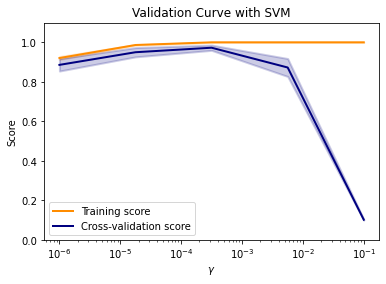

In [25]:
#Graficamos la curva de validación con el codigo indicado
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    model_svc, X, y, param_name="gamma", param_range=param_range,
    scoring="precision_micro", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [26]:
#Graficamos la curva ROC con el codigo asociado
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(model_svc)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

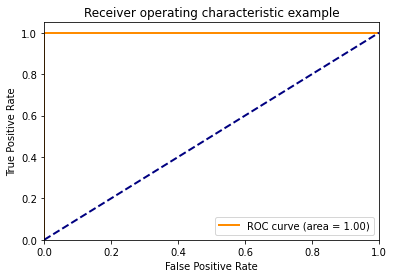

In [27]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

De la curva de validación, se puede ver que el valor score se mantiene dentro del intervalo de confianza que calculamos previamente, bastante cercano a uno, por lo cual se puede conluir que nuestro modelo se ajusto bastante bien a los datos.

Por otro lado podemos ver en la curva ROC, que se cubre practicamente toda el área bajo la cruva, por lo cual el modelo es bastante bueno. 

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


Selección de atributos

In [28]:
#Importamos las librerias necesarias

from sklearn.feature_selection import SelectKBest,chi2 

X_new = SelectKBest(chi2, k=20).fit_transform(X, y) #Seleccionamos los mejores datos

X_new.shape

(1797, 20)

Extracción de atributos

In [29]:
#Escalamos nuestros datos con la función standarscaler
from sklearn.preprocessing import StandardScaler

df = digits

features = df.drop(columns=['target']).columns

x_aux = df.loc[:, features].values
y_aux = df.loc[:, ['target']].values

x_aux = StandardScaler().fit_transform(x_aux)

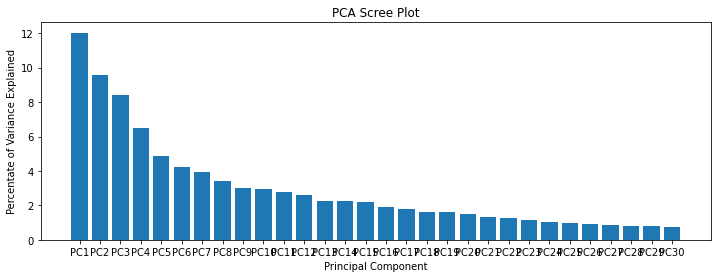

In [30]:
# Ajustamos el modelo
from sklearn.decomposition import PCA

pca = PCA(n_components=30) #Utilizamos 30 componentes
principalComponents = pca.fit_transform(x_aux)

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11',
          'PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21',
          'PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,31), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

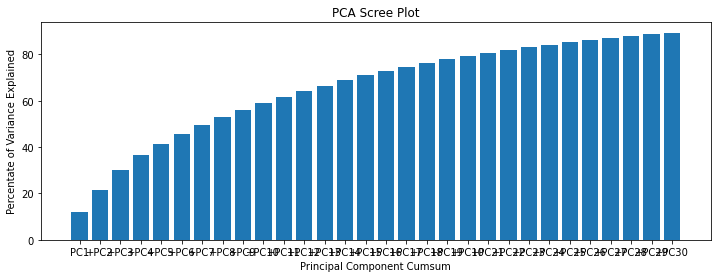

In [31]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', '+PC2', '+PC3', '+PC4','+PC5','+PC6','+PC7','+PC8','+PC9','+PC10','+PC11',
          '+PC12','+PC13','+PC14','+PC15','+PC16','+PC17','+PC18','+PC19','+PC10','+PC21'
          ,'+PC22','+PC23','+PC24','+PC25','+PC26','+PC27','+PC28','+PC29','+PC30']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,31), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

Luego, podemos ver que la varianza de las variables se puede explicar en aproximadamente un 85% considerando 30 componentes, a continuacion realizamos el ajuste para estas componentes

In [32]:
pca = PCA(n_components=30) #Inicializamos nuestro modelo

columns_aux = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11',
          'PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21',
          'PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30']

principalComponents = pca.fit_transform(x_aux) 
principalDataframe = pd.DataFrame(data = principalComponents, columns = columns_aux)
targetDataframe = df[['target']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
newDataframe.head() #Creamos un nuevo dataframe con las nuevas clases filtradas

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,target
0,1.914214,-0.954502,-3.946035,2.028725,-0.267168,0.530326,-1.415326,1.496103,0.125015,-0.822340,...,0.556929,0.513035,-0.755188,-0.464892,0.729763,0.341663,0.144854,0.370069,-0.314209,0
1,0.588981,0.924637,3.924755,-1.779852,-0.993429,-0.675654,1.878581,0.556328,1.079978,0.087340,...,-0.242927,-0.471471,0.496201,0.793139,0.075001,-1.537336,-0.709204,-0.885974,-0.231348,1
2,1.302039,-0.317189,3.023334,-2.043401,-2.081145,0.935118,-1.296281,1.155978,0.785135,-1.099000,...,0.075488,-1.292479,-0.405384,-0.398024,-0.109554,0.310119,0.252535,-0.232851,1.120571,2
3,-3.020771,-0.868772,-0.801745,-2.187036,-0.556833,0.727133,0.959719,-1.382663,0.258986,0.744735,...,-0.165654,0.570540,-0.531494,-0.087418,-0.467504,0.156973,-0.423010,0.322184,-1.240445,3
4,4.528949,-1.093480,0.973121,-1.419498,-1.715107,1.431584,1.073733,-0.968178,-1.659986,1.174452,...,-0.188775,0.970857,-0.178887,0.560094,-2.150324,0.113382,0.717413,1.038035,0.283782,4


In [33]:
# componenetes proyectadas

Y_aux= df[['target']]
X_new = pca.fit_transform(df[digits.drop(columns=['target']).columns])

X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y_aux, test_size=0.2, random_state = 2)

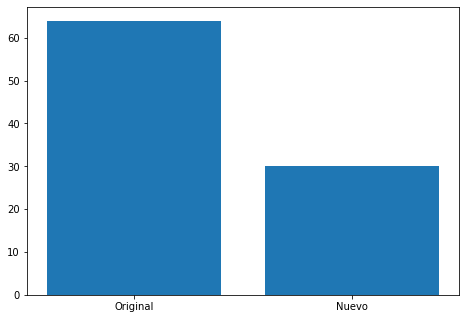

In [34]:
#Comparamos las cantidad de datos de los conjuntos
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1])
langs = ['Original', 'Nuevo']
students = [X.shape[1],X_new.shape[1]]
ax.bar(langs,students)
plt.show()

Podemos ver que el conjunto original tiene muchos más datos que al cual le aplicamos un filtro.

In [35]:
X = digits.drop(columns="target").values
y = digits["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
parametros_sv = {'kernel':['rbf','linear'],'C':[1,10,20,30]}

clf_sv = GridSearchCV(svm.SVC(),parametros_sv,cv = 5, return_train_score =False)

clf_sv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30], 'kernel': ['rbf', 'linear']})

In [37]:
print(clf_sv.best_score_)
print(clf_sv.best_params_)
print('tiempo de entrenamiento = '+str(pd.DataFrame(clf_sv.cv_results_)['std_fit_time'].max()))
t_original = pd.DataFrame(clf_sv.cv_results_)['std_fit_time'].max()

0.9916545683313978
{'C': 10, 'kernel': 'rbf'}
tiempo de entrenamiento = 0.005597525698270285


In [38]:
parametros_sv = {'kernel':['rbf','linear'],'C':[1,10,20,30]}

clf_sv = GridSearchCV(svm.SVC(),parametros_sv,cv = 5, return_train_score =False)

clf_sv.fit(X_train_new,Y_train_new)

C:\Users\jvall\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jvall\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jvall\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jvall\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

C:\Users\jvall\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jvall\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jvall\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jvall\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30], 'kernel': ['rbf', 'linear']})

In [39]:
print(clf_sv.best_score_)
print(clf_sv.best_params_)
print('tiempo de entrenamiento = '+str(pd.DataFrame(clf_sv.cv_results_)['std_fit_time'].max()))
t_nuevo = pd.DataFrame(clf_sv.cv_results_)['std_fit_time'].max()

0.9902656794425088
{'C': 1, 'kernel': 'rbf'}
tiempo de entrenamiento = 0.0027171364738716704


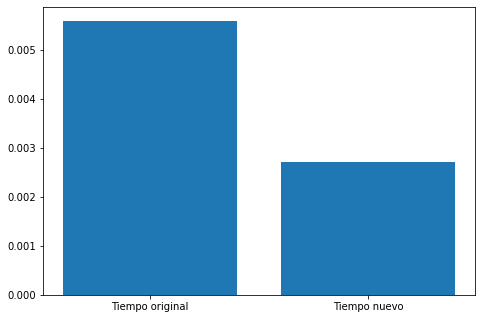

In [40]:
#Comparamos los tiempos que demora el modelo en ajustarse con los distintos conjuntos que tenemos
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Tiempo original', 'Tiempo nuevo']
students = [t_original,t_nuevo]
ax.bar(langs,students)
plt.show()

Además, claramente podemos observar que el modelo es más véloz si utilizamos el nuevo conjunto de datos.

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [41]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    Y_pred = np.array((modelo.predict(X_test)))
    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (Y_pred == Y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (Y_pred != Y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = Y_test[mask]
    y_aux_pred = Y_pred[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i 
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

In [42]:
modelo = svm.SVC(C=10,kernel='rbf',probability=True) #Inicializamos el modelo del ejercicio 3

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 



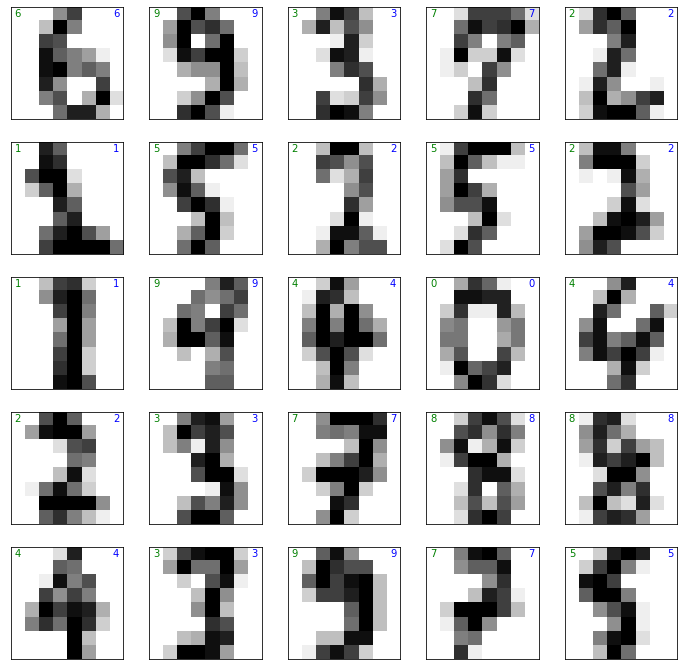

In [43]:
mostar_resultados(digits,modelo,nx=5, ny=5,label = "correctos")

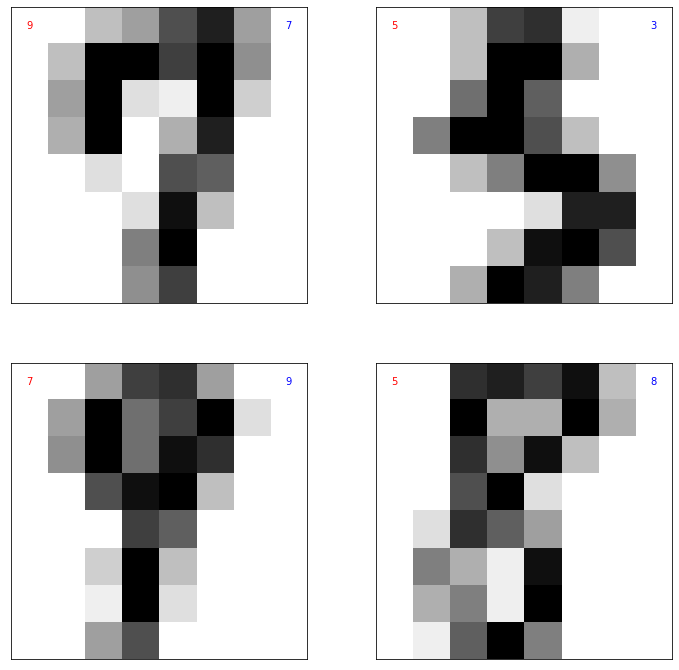

In [44]:
mostar_resultados(digits,modelo,nx=2, ny=2,label = "incorrectos")

* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

Al ver las imagenes, podemos observar que cuando el valor predicho y el original son distintos la forma en la que esta escrito el numero no es del todo clara, incluso para una persona, por lo cual es factible que el modelo con los datos que tiene pueda asociar las imagenes a numeros que no son.

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Podemos concluir que el modelo escogido resultó ser bastante efectivo, ya que tenemos sólo 5 fallas, las cuales incluso a simple vista son difíciles de determinar, por lo cual se hizo un buen ajuste del modelo, también podemos decir que escoger el modelo con la mejor métrica y no el más rápido fue un acierto. Por otro lado las principales dificultades que surgieron a lo largo de este trabajo, fue trabajar con arreglos de diferentes dimensiones, debido a que muchas veces uno aplicaba un código y no se ejucutaba bien ya que se operaban arreglos de distintas dimensiones lo cual fue bastante frustante por momentos, principalmente cuando el error no era tan claro. Para trabajos futuros intentaría agregar las fallas que tuvo el modelo, para que este pueda realizar una buena predicción, por que como vimos los dígitos en donde fallo el modelo son bastante difíciles de diferenciar y es por eso que los intentaría agregar como casos específicos para que así el modelo pueda tener una mayor precisión.

Además se pudo observar que filtrar los datos puede ser bastante útil, en nuestro caso quízas no por la poca memoria que utilizaban los datos, pero en casos donde los dataset ocupen gb de memoria este filtro resulta vítal para poder tener por un lado un código eficiente y también para que el modelo no tarde tanto tiempo en ajustarse, en nuestro caso vimos que el fitlrar los datos redujó casí a la mitad el tiempo de ajuste del modelo, y esto en un caso de mayor tamaño se amplifica.